## Imports and prerequisits

In [1]:
%pylab inline
import numpy as np
import scipy
from scipy import signal
import os
import csv
from my_logger import log_progress

matplotlib.rcParams['savefig.dpi'] = 120
import seaborn as sns
sns.set_style('whitegrid',{'grid.linestyle': u'--'})

sys.path.append('/home/marrabld/Dropbox/2_PhD/bootstrap/bootstrappy')
sys.path.append('/home/marrabld/Dropbox/2_PhD/bootstrap/bootstrappy/libbootstrap')

import libbootstrap.spectralmodel as spectralmodel
import scipy
import libbootstrap.spectra_generator as spectra_generator

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

from libs.models import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
def grab_file(b):
    remote_file = txt.value
    print("Grabbing :: " + remote_file)
    !wget "$remote_file" -O 'inputs/rrs_files/rrs.csv'

In [3]:
heading = widgets.HTML(
    value="<center><h2>Enter Remote URL to .CSV file</h2></center>"
)
display(heading)

txt = widgets.Text(description='Remote URL')
txt.width = "800px"

#print(remote_file)
display(txt)

#remote_file = txt.value()

btn = widgets.Button(description='Pull File', button_style='primary')
btn.on_click(grab_file)
#btn.on_click(print_val)
display(btn)

In [4]:
def plot_inverted(rrs_num=1):
    
    _label = '$a_\phi = ' + str(data[rrs_num].x[0]) + '$' + \
    '\n $a_g = ' + str(data[rrs_num].x[1]) + '$' + \
    '\n $b_{bp} = ' + str(data[rrs_num].x[2]) + '$'

    model_rrs = dc.func(data[rrs_num].x)
    measured_rrs = dc.rrs[1, :]

    pylab.plot(wavelengths, model_rrs , 'k' , alpha = 0.75, label=_label)

    rms = rmse(model_rrs, measured_rrs)

    pylab.plot(wavelengths, measured_rrs, alpha = 0.75, label='$RMSE = ' + str(rms) + '$')

    pylab.legend()
    print(data[rrs_num])

    pylab.show()

In [5]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [6]:
def plot_fwd(i_rrs=5, X=0.001, G=0.001, P=0.001):
    rrs = np.genfromtxt('./inputs/rrs_files/synthRrs.csv', delimiter=',')
    
    _label = '$a_\phi = ' + str(P) + '$' + \
    '\n $a_g = ' + str(G) + '$' + \
    '\n $b_{bp} = ' + str(X) + '$'
    
    
    
    #for i_iter in np.linspace(0, 0.1, num_iters):
    forward = dc.func([P, X, G])  # P, X, -d-, G [0.01 0.1 0.0 0.1]
    
    rms = rmse(rrs[i_rrs], forward)
    plot(wavelengths, forward, label=_label)
    
    plot(wavelengths, rrs[i_rrs], 'k', alpha=0.75, label='$RMSE = ' + str(rms) + '$')
    
    pylab.legend()

   status: 0
  success: True
     njev: 19
     nfev: 95
 hess_inv: array([[   83.02569458,    13.01807917,   329.97137657],
       [   13.01807917,     2.52662212,    52.26906734],
       [  329.97137657,    52.26906734,  1328.39778641]])
      fun: 3.7580347263839264e-06
        x: array([ 0.41150849,  0.02860031,  0.13563938])
  message: 'Optimization terminated successfully.'
      jac: array([  4.83599027e-06,   1.75893649e-06,  -1.30708779e-06])


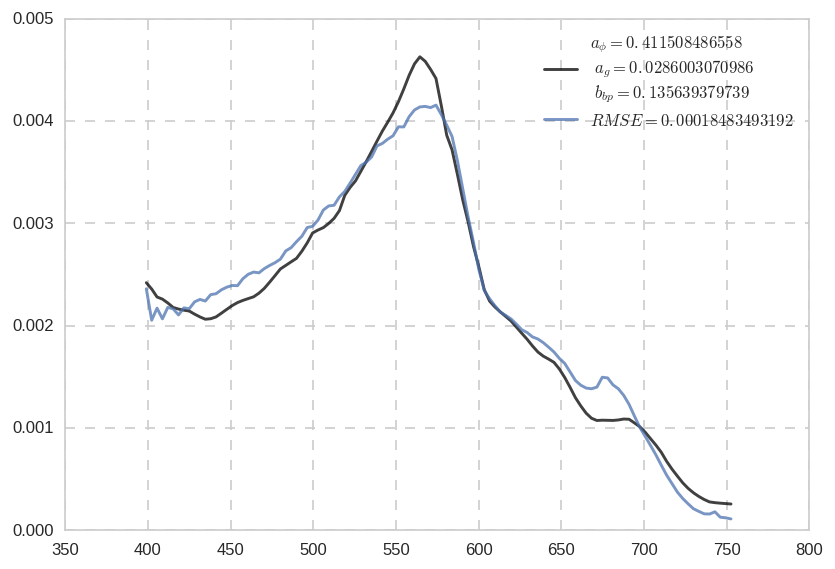

<function __main__.plot_inverted>

In [7]:
rrs_file = './inputs/rrs_files/rrs.csv'
rrs = np.genfromtxt(rrs_file, delimiter=',')
wavelengths = rrs[0, :]

dc = HopeDeep(wavelengths);

dc.rrs = np.genfromtxt(rrs_file, delimiter=',')

#plot(dc.rrs[0,:], dc.rrs[1,:])
#pylab.show()

dc.read_all_iops_from_files();
#print(dc.a_phi)
#plot(dc.a_phi[0])
#print(dc.run(num_iters=1));
data = dc.run(num_iters=1);
#forward = dc.func()

print(data)

interact(plot_inverted, rrs_num=(1, len(data[0])))


------

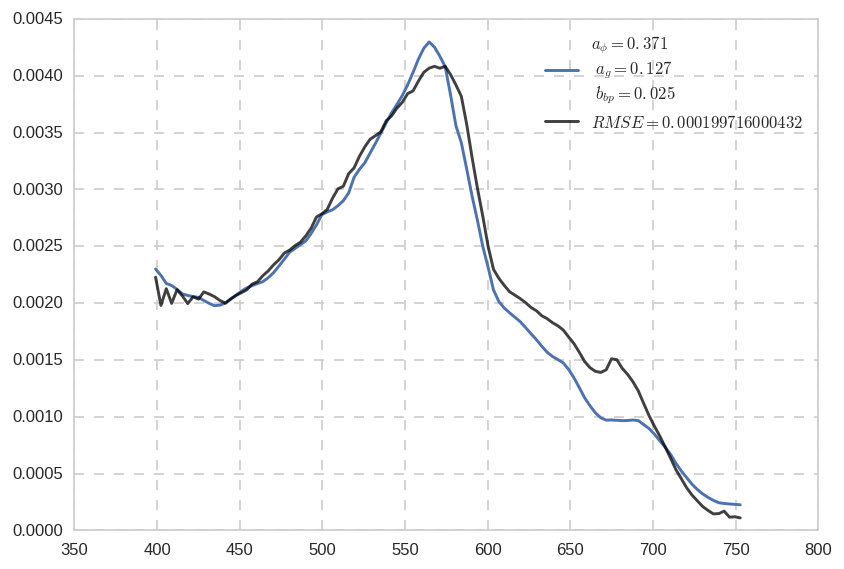

In [8]:
interact(plot_fwd, i_rrs=(0,rrs.shape[0] -1),  G=(0.001,1, 0.001), num_iters=(1, 100), P=(0.001, 1, 0.001), X=(0.00, 0.08, 0.001))